In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Splitting the Dataset

- Division into sets:
    - For modelers (70%) - X_modelling, y_modelling
    - For validators (30%) - X_validating, y_validating

- Splitting the modeler's dataset into:
    - Training set (70%) - X_train, y_train
    - Validation set (20%) - X_val, y_val
    - Test set (10%) - X_test, y_test

In [2]:
spotify_full_df = pd.read_csv('../Data/spotify-2023.csv', encoding='latin1')

mod_df, val_df = train_test_split(
    spotify_full_df, test_size=0.3, random_state=42
)

print(mod_df.shape)

print(val_df.shape)

(667, 24)
(286, 24)


Saving separate CSV files for modelers and validators

In [3]:
mod_df.to_csv('../Data/spotify_modelling.csv', index=False)
val_df.to_csv('../Data/spotify_validating.csv', index=False)


Splitting the dataset for modelers into training, validation, and test sets

In [4]:
X_train, X_val = train_test_split(
    mod_df, test_size=0.3, random_state=42
)
X_val, X_test = train_test_split(
    X_val, test_size=0.3, random_state=42
)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(466, 24)
(140, 24)
(61, 24)


# 2. Data Import

In [5]:
spotify_df = pd.read_csv('../Data/spotify_modelling.csv')
spotify_df.head(10) 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,You Proof,Morgan Wallen,1,2022,5,13,2128,9,367814306,37,...,120,A,Major,73,64,85,25,0,61,3
1,Adore You,Harry Styles,1,2019,12,6,13454,1,1439191367,246,...,99,G#,Major,68,57,77,2,0,10,5
2,Piï¿½ï¿½man Deï¿,"Semicenk, Doï¿½ï¿½u",2,2023,6,2,185,3,43522589,5,...,98,A#,Minor,73,45,62,28,0,13,13
3,CORAZï¿½ï¿½N VA,Maria Becerra,1,2023,6,22,370,20,43857627,12,...,98,C#,Major,68,40,79,33,0,30,6
4,Those Eyes,New West,1,2019,5,10,1507,14,411747614,24,...,120,E,Major,60,24,35,73,0,31,3
5,Crown,Kendrick Lamar,1,2022,5,13,1493,0,42485571,2,...,170,C#,Minor,37,14,24,80,0,11,4
6,HUMBLE.,Kendrick Lamar,1,2017,3,30,33206,1,1929770265,284,...,150,C#,Minor,91,42,60,0,0,9,12
7,I Know - PR1SVX Edit,"Kanii, PR1ISVX",2,2023,3,24,407,0,77377503,16,...,134,B,Minor,67,11,76,8,47,30,7
8,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",2,2020,3,27,15894,8,1802514301,198,...,103,F#,Minor,70,92,83,1,0,7,6
9,DOGTOOTH,"Tyler, The Creator",2,2023,3,27,1479,0,80758350,23,...,78,G#,Major,71,80,65,51,0,22,32


In [13]:
print(spotify_full_df.shape)

(953, 24)


### About dataset

Our dataset has 953 records and 24 columns.

**Columns descriptions**

- **track_name**: Name of the song
- **artist(s)_name**: Name of the artist(s) of the song
- **artist_count**: Number of artists contributing to the song
- **released_year**: Year when the song was released
- **released_month**: Month when the song was released
- **released_day**: Day of the month when the song was released
- **in_spotify_playlists**: Number of Spotify playlists the song is included in
- **in_spotify_charts**: Presence and rank of the song on Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the song is included in
- **in_apple_charts**: Presence and rank of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the song is included in
- **in_deezer_charts**: Presence and rank of the song on Deezer charts
- **in_shazam_charts**: Presence and rank of the song on Shazam charts
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song


# 3. Checking Basic Information about the Dataset

In [3]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            667 non-null    object
 1   artist(s)_name        667 non-null    object
 2   artist_count          667 non-null    int64 
 3   released_year         667 non-null    int64 
 4   released_month        667 non-null    int64 
 5   released_day          667 non-null    int64 
 6   in_spotify_playlists  667 non-null    int64 
 7   in_spotify_charts     667 non-null    int64 
 8   streams               667 non-null    object
 9   in_apple_playlists    667 non-null    int64 
 10  in_apple_charts       667 non-null    int64 
 11  in_deezer_playlists   667 non-null    object
 12  in_deezer_charts      667 non-null    int64 
 13  in_shazam_charts      632 non-null    object
 14  bpm                   667 non-null    int64 
 15  key                   598 non-null    ob

In [4]:
# missing values in:  key,  in_shazam_charts
spotify_df.columns[spotify_df.isnull().any()].tolist()

['in_shazam_charts', 'key']

In [5]:
spotify_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,1.557721,2018.091454,5.992504,14.071964,5415.815592,12.259370,67.614693,50.760120,2.617691,121.865067,67.061469,52.097451,64.295352,26.643178,1.467766,17.916042,10.157421
std,0.890834,11.212620,3.573544,9.382796,8196.740713,20.156227,84.156261,49.902241,6.154848,27.979719,14.924660,23.506969,16.296834,25.882359,8.087366,13.518161,9.781430
min,1.000000,1942.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,888.500000,0.000000,13.000000,6.000000,0.000000,98.000000,57.000000,33.000000,54.000000,6.000000,0.000000,9.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2291.000000,3.000000,34.000000,36.000000,0.000000,120.000000,69.000000,52.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,6031.000000,16.000000,85.500000,84.000000,2.000000,140.000000,78.000000,71.000000,77.000000,41.000000,0.000000,23.000000,11.500000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,537.000000,263.000000,58.000000,206.000000,95.000000,97.000000,97.000000,97.000000,90.000000,97.000000,59.000000


Numeric vs categorical

In [6]:
# 16 numeric variables
numeric = ['in_shazam_charts','in_deezer_charts','in_deezer_playlists','in_apple_charts','in_apple_playlists','streams','in_spotify_charts','in_spotify_playlists','bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# 8 categorical variables
categorical = list(set(spotify_df.columns) - set(numeric))
len(numeric)

16

# 4. Incorrect and missing values

In [7]:
spotify_df = spotify_df.where(pd.notna(spotify_df), None)

columns: streams, in_deezer_playlists, in shazam_charts should be numeric, but are type object. Let's find out why

In [8]:
streams =spotify_df["streams"].astype(str)
streams[0]
streams_with_letters =streams[streams.str.contains('[a-zA-Z]')]
streams_with_letters.shape
# one row contains letters
print(spotify_df.iloc[497].streams)


BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [9]:
spotify_df.at[497, 'streams'] = None
spotify_df['streams'] = spotify_df['streams'].astype(float)

in_deezer_playlists

In [10]:
in_deezer_playlists =spotify_df["in_deezer_playlists"].astype(str)
in_deezer_playlists_with_letters =in_deezer_playlists[in_deezer_playlists.str.contains('[a-zA-Z,\\-?!_]')]
print(in_deezer_playlists_with_letters.shape)
print(in_deezer_playlists_with_letters)
# 61 rows contain comma value
print(spotify_df.iloc[21])

(61,)
6      1,481
15     4,180
21     2,733
27     1,315
47     2,969
       ...  
588    1,003
616    1,145
621    4,623
649    6,720
662    1,034
Name: in_deezer_playlists, Length: 61, dtype: object
track_name              Do I Wanna Know?
artist(s)_name            Arctic Monkeys
artist_count                           1
released_year                       2013
released_month                         1
released_day                           1
in_spotify_playlists               33783
in_spotify_charts                     26
streams                     1788326445.0
in_apple_playlists                   133
in_apple_charts                       92
in_deezer_playlists                2,733
in_deezer_charts                       1
in_shazam_charts                      26
bpm                                   85
key                                    F
mode                               Major
danceability_%                        55
valence_%                             42
energy_%           

In [11]:
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].str.replace(',', '', regex=False)
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].astype(int)

in_shazam_charts

In [12]:
in_shazam_charts =spotify_df["in_shazam_charts"].astype(str)
in_shazam_charts_with_letters =in_deezer_playlists[in_deezer_playlists.str.contains('[a-zA-Z,\\-?!_]')]
print(in_shazam_charts_with_letters.shape)
print(in_shazam_charts_with_letters)

(61,)
6      1,481
15     4,180
21     2,733
27     1,315
47     2,969
       ...  
588    1,003
616    1,145
621    4,623
649    6,720
662    1,034
Name: in_deezer_playlists, Length: 61, dtype: object


In [13]:
spotify_df['in_shazam_charts'] = spotify_df['in_shazam_charts'].str.replace(',', '', regex=False)
spotify_df['in_shazam_charts'] = spotify_df['in_shazam_charts'].astype(float)

key

In [14]:
spotify_df.loc[list(spotify_df.key.isna()),'key']

12     None
25     None
28     None
36     None
37     None
       ... 
635    None
639    None
641    None
654    None
664    None
Name: key, Length: 69, dtype: object

In [15]:
spotify_df.loc[list(spotify_df.in_shazam_charts.isna()),['key','in_shazam_charts']]

,key,in_shazam_charts
16,G#,NaN
29,D,NaN
41,G#,NaN
43,None,NaN
51,B,NaN
52,A#,NaN
72,C#,NaN
73,A#,NaN
77,G,NaN
86,G#,NaN


8 records where both key and in_shazam_charts are missing, 35 missing in shazam_charts and 69 missing key values

In [16]:
object_columns = spotify_df.select_dtypes(include=['object']).columns
spotify_df[object_columns] = spotify_df[object_columns].astype(str)

# 5. Distribution of numeric variables

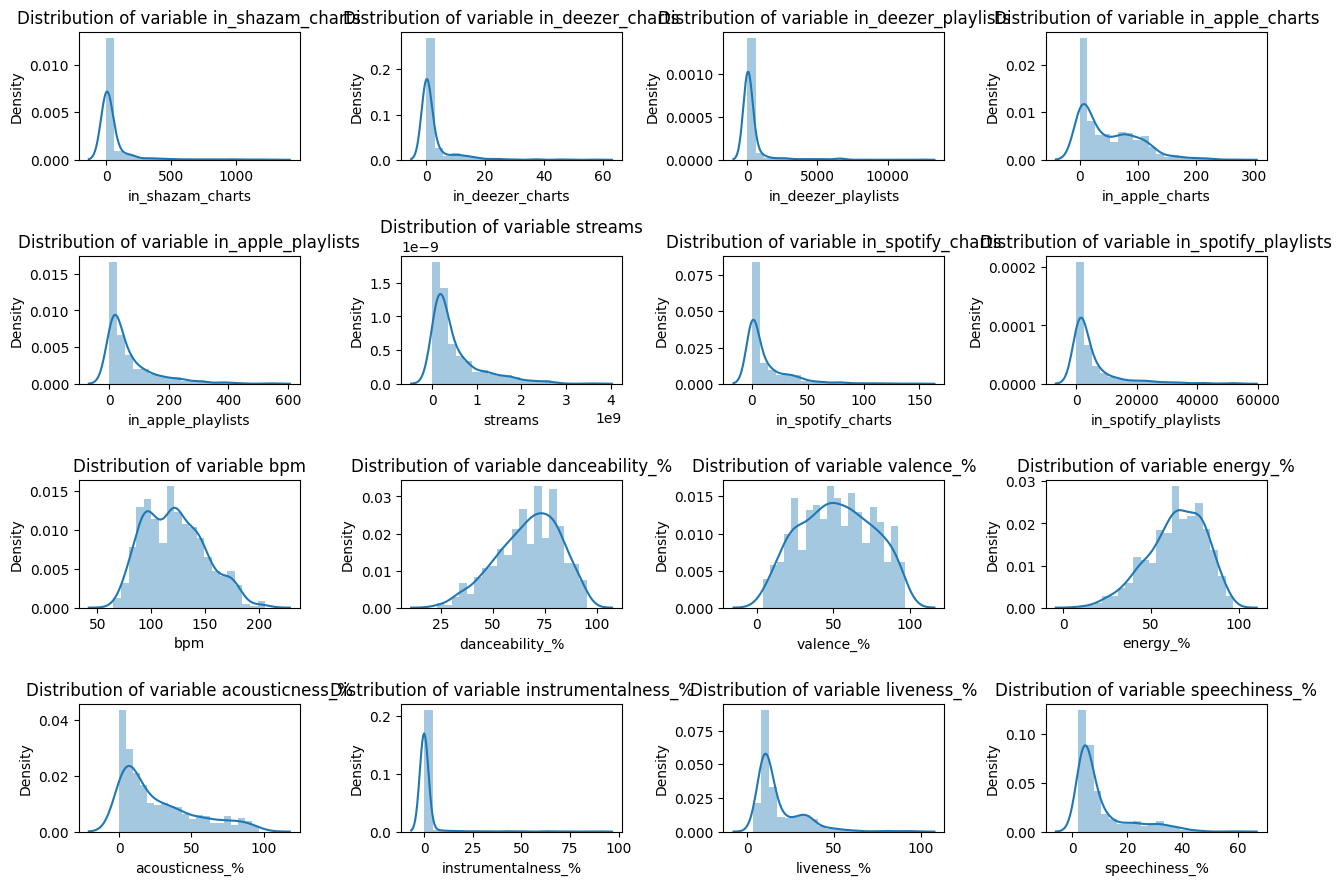

In [17]:
plt.figure(figsize=(13, 13))

#columns = ['artist_count', 'released_year', 'released_month', 'released_day', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

r = 6  # Number of rows in the subplot grid
c = 4  # Number of columns in the subplot grid

for i, column in enumerate(numeric):
    plt.subplot(r, c, i+1)
    dis_dist = sns.distplot(spotify_df[column], bins=20)
    dis_dist.set_title(f'Distribution of variable {column}')  

plt.tight_layout() 
plt.show()

In [18]:
spotify_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,6.660000e+02,667.000000,667.000000,667.000000,667.000000,632.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,1.557721,2018.091454,5.992504,14.071964,5415.815592,12.259370,5.243761e+08,67.614693,50.760120,405.100450,2.617691,59.090190,121.865067,67.061469,52.097451,64.295352,26.643178,1.467766,17.916042,10.157421
std,0.890834,11.212620,3.573544,9.382796,8196.740713,20.156227,5.707570e+08,84.156261,49.902241,1183.162593,6.154848,160.012063,27.979719,14.924660,23.506969,16.296834,25.882359,8.087366,13.518161,9.781430
min,1.000000,1942.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,888.500000,0.000000,1.448032e+08,13.000000,6.000000,13.000000,0.000000,0.000000,98.000000,57.000000,33.000000,54.000000,6.000000,0.000000,9.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2291.000000,3.000000,2.976964e+08,34.000000,36.000000,44.000000,0.000000,2.000000,120.000000,69.000000,52.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,6031.000000,16.000000,6.888465e+08,85.500000,84.000000,181.000000,2.000000,36.000000,140.000000,78.000000,71.000000,77.000000,41.000000,0.000000,23.000000,11.500000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,537.000000,263.000000,12367.000000,58.000000,1281.000000,206.000000,95.000000,97.000000,97.000000,97.000000,90.000000,97.000000,59.000000


# 6. Outliers

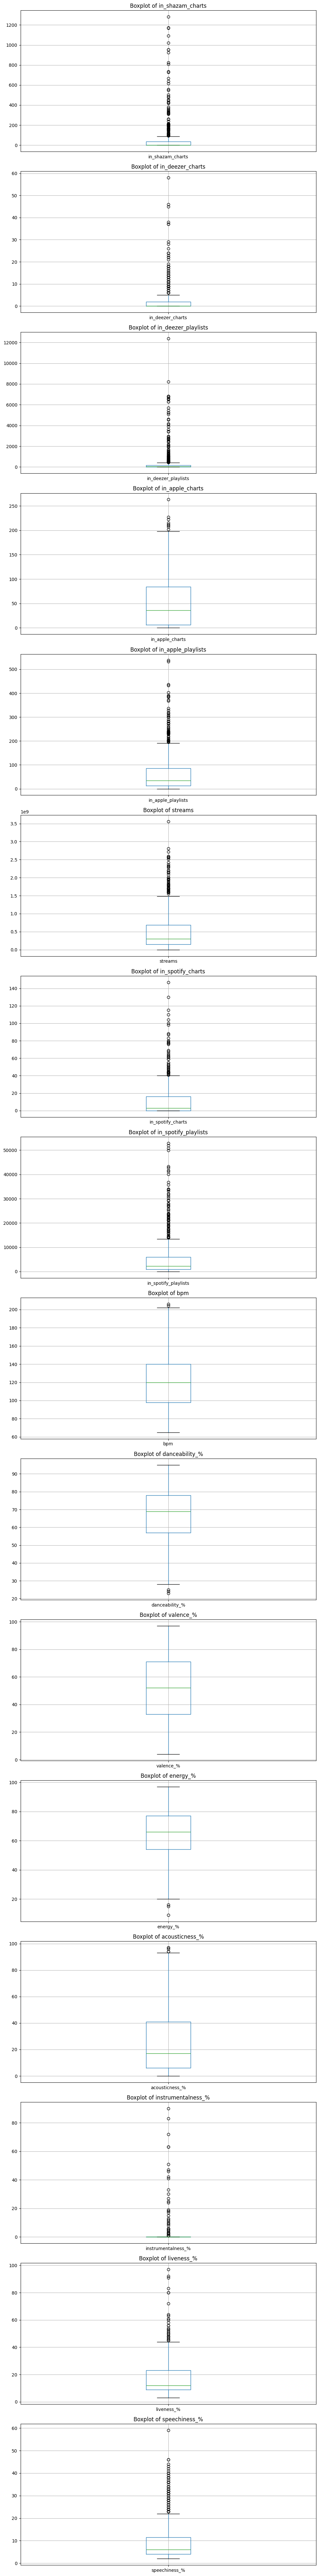

In [19]:
fig, axes = plt.subplots(nrows=len(numeric), ncols=1, figsize=(10, 5*len(numeric)))
for ax, col in zip(axes, numeric):
    spotify_df.boxplot(column=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

in my opinion there are no big outliers in this dataset 

# 7. Analysis of values and dependencies in the dataset

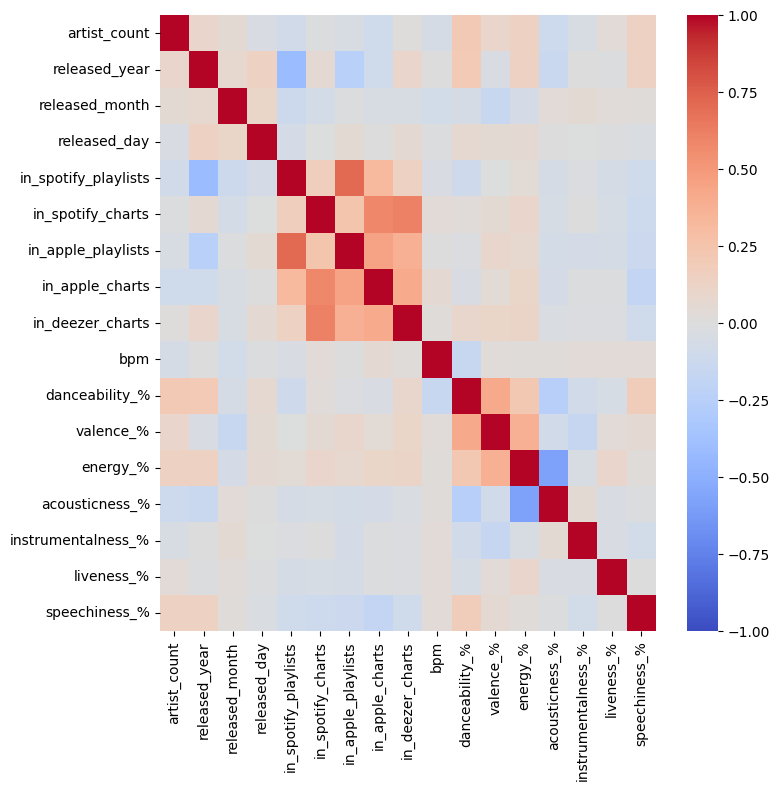

In [31]:
spotify_short_df = spotify_df.loc[:, ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
correlation_matrix = spotify_short_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=False, vmin=-1, vmax=1, cmap='coolwarm', fmt=".2f")
plt.show()

# 8. Categorical variables

Lets check how many unique values our categorical variables have

In [20]:
{col: spotify_df[col].nunique() for col in categorical}

{'released_month': 12,
 'artist_count': 8,
 'mode': 2,
 'track_name': 664,
 'released_day': 31,
 'artist(s)_name': 477,
 'key': 12,
 'released_year': 46}

In [21]:
duplicate_track_names = spotify_df['track_name'][spotify_df['track_name'].duplicated(keep=False)]
duplicate_rows = spotify_df[spotify_df['track_name'].isin(duplicate_track_names)]
duplicate_rows

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
140,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473.0,242,...,109,A#,Minor,84,72,74,10,0,34,7
170,Miss You,"Robin Schulz, Oliver Tree",2,2022,8,5,5730,10,497225336.0,108,...,145,F#,Minor,59,20,74,1,0,15,5
340,Miss You,Southstar,1,1982,5,16,2020,0,154356956.0,77,...,145,A,Major,66,24,58,17,0,19,5
602,Daylight,David Kushner,1,2023,4,14,3528,98,387570742.0,80,...,130,D,Minor,51,32,43,83,0,9,3
615,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204.0,21,...,146,None,Major,69,63,45,48,0,18,4
651,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473.0,0,...,109,A#,Minor,84,72,74,10,0,34,7


In [22]:
some_rows = spotify_df[spotify_df['artist(s)_name'].str.contains('Kanye', case=False, na=False)]
some_rows
# if song was performed by a few artists it is considered as new artist. We might do something about that in future


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
27,Heartless,Kanye West,1,2008,1,1,17504,34,887906111.0,63,...,88,A#,Minor,79,66,65,5,0,25,14
349,City of Gods,"Kanye West, Alicia Keys, Fivio Foreign",3,2022,2,11,2096,0,107255472.0,34,...,147,G#,Minor,47,50,80,10,0,32,38
618,Hot Shit (feat. Ye & Lil Durk),"Kanye West, Lil Durk, Cardi B",3,2022,7,1,1601,0,85924992.0,11,...,157,A,Major,88,52,69,0,0,8,23


In [29]:
cols_for_barplot = list(set(categorical) - set(["artist(s)_name",'track_name']))
cols_for_barplot.sort()


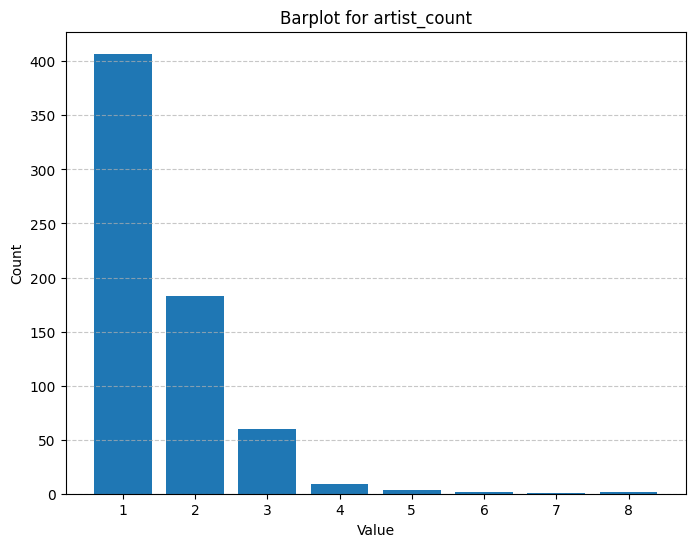

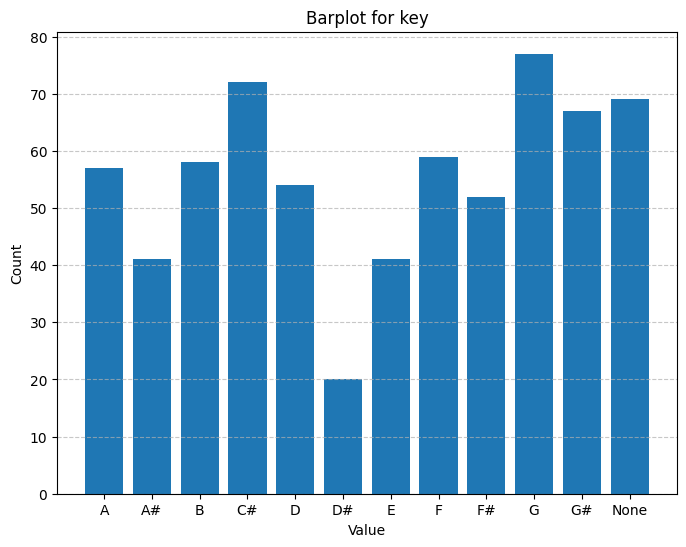

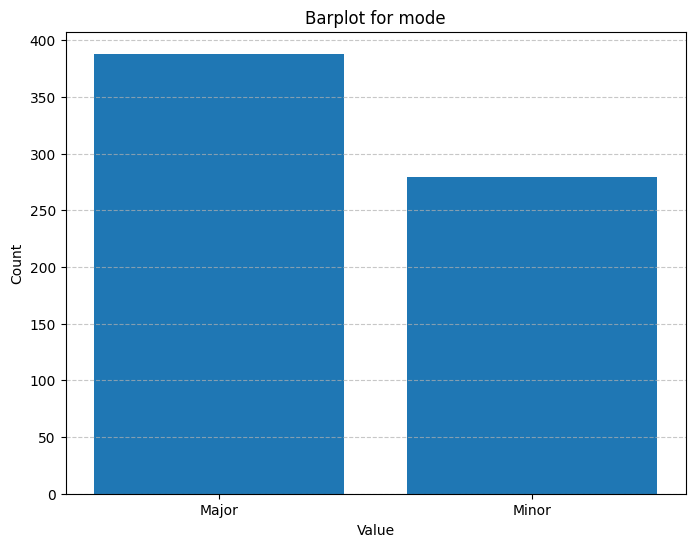

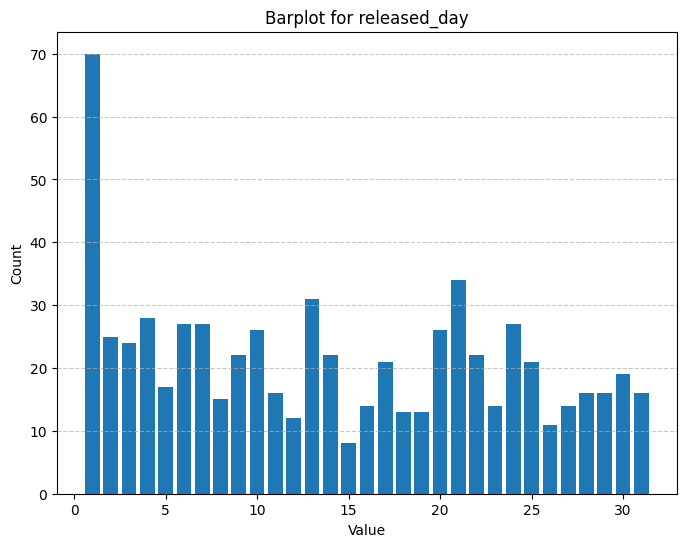

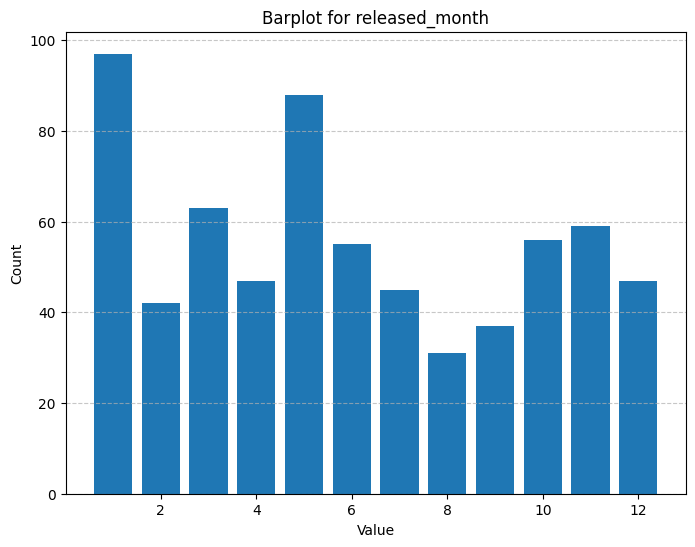

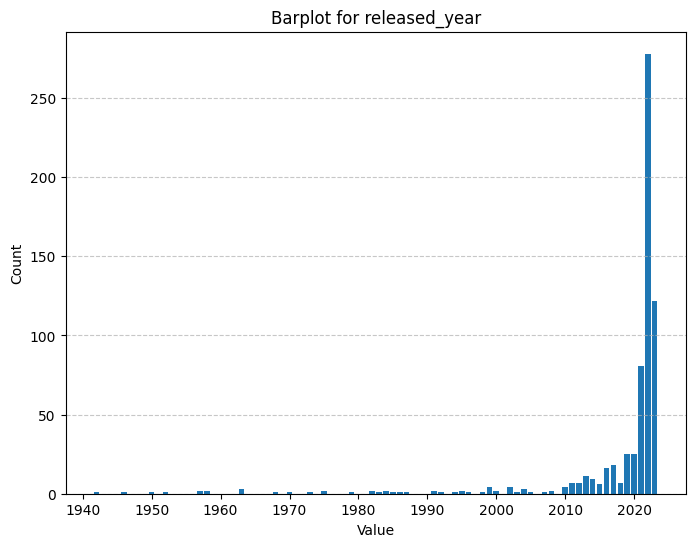

In [30]:

for column in cols_for_barplot:
    plt.figure(figsize=(8, 6))
    unique_values = sorted(spotify_df[column].unique())
    counts = [spotify_df[column].value_counts()[val] for val in unique_values]
    plt.bar(unique_values,counts)
    plt.title(f'Barplot for {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.show()

# 9. Elbow method and KMeans

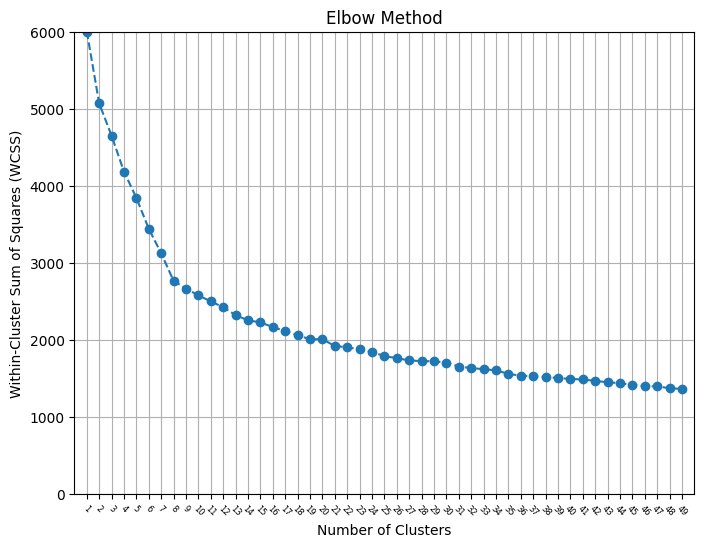

In [63]:
cols =['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','released_year']
X = spotify_df[cols]
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
wcss = []

n =50

for k in range(1, n):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, n), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.ylim(0,6000)
plt.xlim(0,n)
plt.xticks(range(1, n),rotation=-45,size =6)
plt.grid(True)
plt.show()

15 clusters

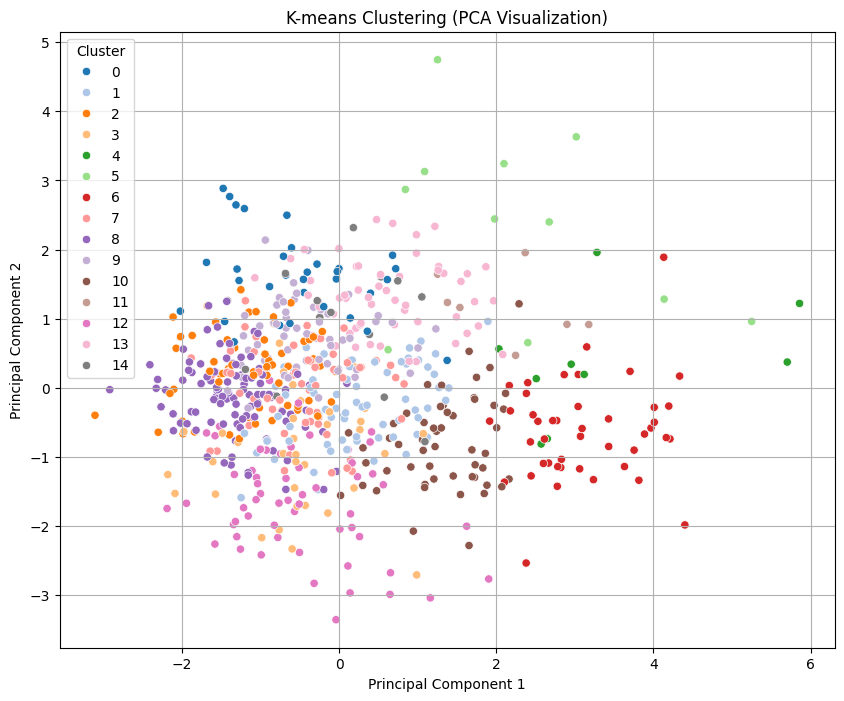

In [16]:
from mpl_toolkits.mplot3d import Axes3D
cols =['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','released_year']
X = spotify_df[cols]

pca = PCA(n_components=2)  
X_standardized = (X - X.mean()) / X.std()
X_pca = pca.fit_transform(X_standardized)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=15, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],hue=clusters, palette='tab20', legend='full')
plt.title('K-means Clustering (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()




8 clusters

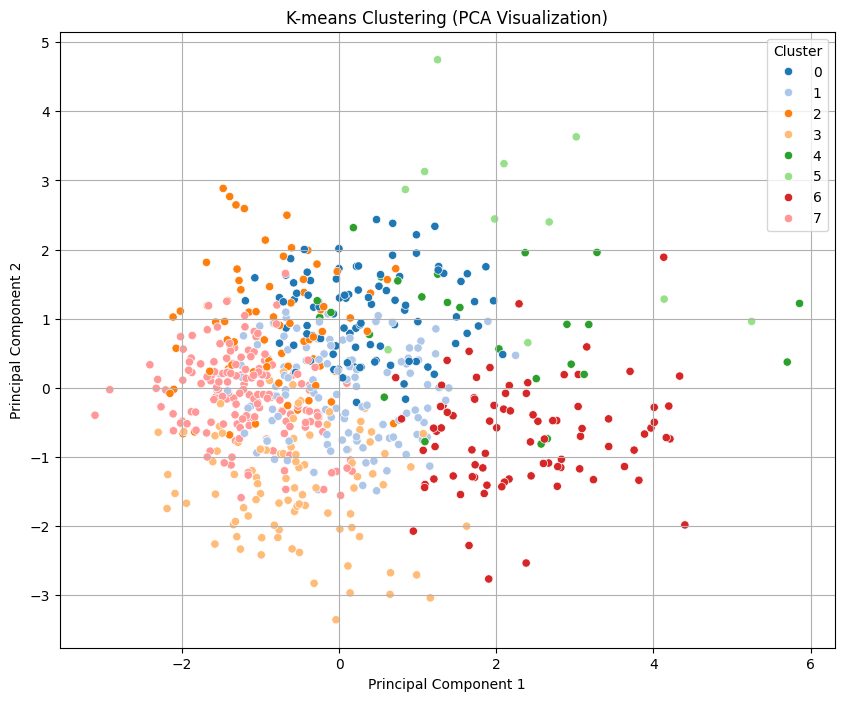

In [8]:
from mpl_toolkits.mplot3d import Axes3D
cols =['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','released_year']
X = spotify_df[cols]

pca = PCA(n_components=2)  
X_standardized = (X - X.mean()) / X.std()
X_pca = pca.fit_transform(X_standardized)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],hue=clusters, palette='tab20', legend='full')
plt.title('K-means Clustering (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

5 clusters

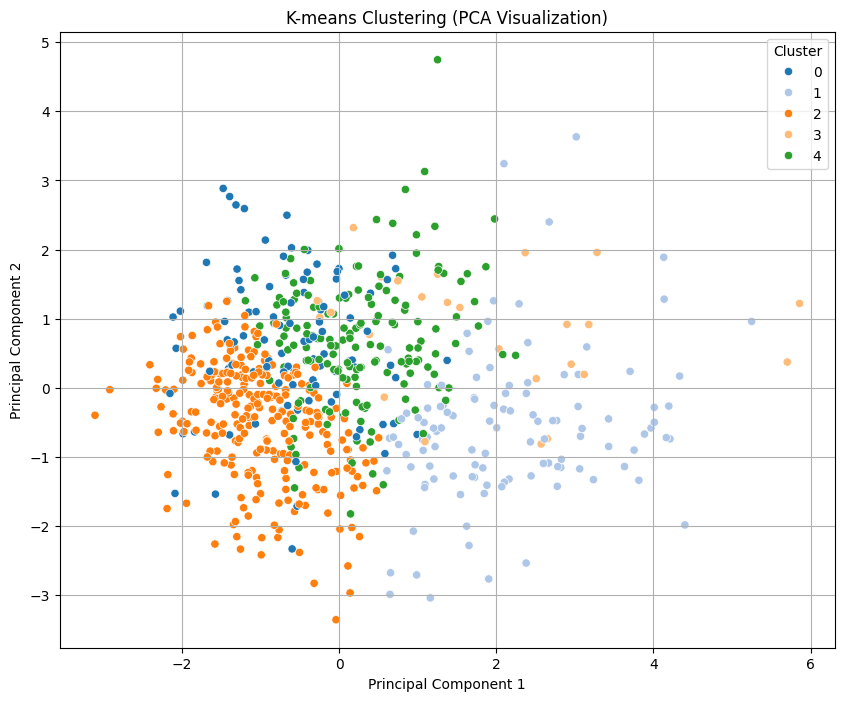

In [10]:
from mpl_toolkits.mplot3d import Axes3D
cols =['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','released_year']
X = spotify_df[cols]

pca = PCA(n_components=2)  
X_standardized = (X - X.mean()) / X.std()
X_pca = pca.fit_transform(X_standardized)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],hue=clusters, palette='tab20', legend='full')
plt.title('K-means Clustering (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### 3D visualisation

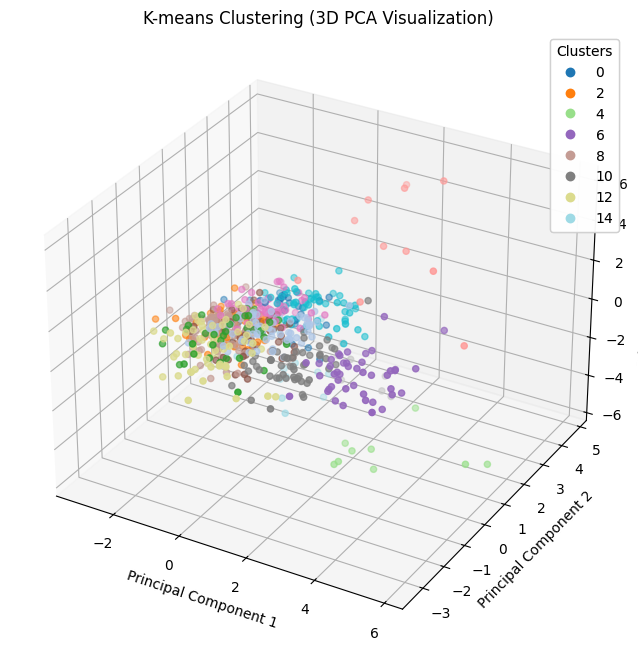

In [17]:
pca = PCA(n_components=3)  
X_standardized = (X - X.mean()) / X.std()
X_pca = pca.fit_transform(X_standardized)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='tab20')

ax.set_title('K-means Clustering (3D PCA Visualization)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

plt.show()
